Camera Calibration with OpenCV
===

### Run the code in the cell below to extract object points and image points for camera calibration.  

In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

CHESS_WIDTH = 7
CHESS_HEIGHT = 5

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((CHESS_WIDTH*CHESS_HEIGHT,3), np.float32)
objp[:,:2] = np.mgrid[0:CHESS_WIDTH, 0:CHESS_HEIGHT].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Open the video file
video_capture = cv2.VideoCapture('video/out2F.mp4')  # Replace 'your_video.mp4' with the path to your video file

# Set the frame skip interval (1 frame every 30)
frame_skip = 300

frame_count = 0
new_resolution = (640, 480)

# Termination criteria for the iterative algorithm
termination_criteria = (cv2.TERM_CRITERIA_EPS +
                        cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

while True:
    # Read a frame from the video
    ret, img = video_capture.read()
    if not ret:
        break  # Break the loop if we've reached the end of the video

    # Skip frames based on the frame_skip value
    if frame_count % frame_skip == 0: 
        # Resize the frame to the new_resolution
        img = cv2.resize(img, new_resolution)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Find the chessboard corners
        found_corners, corners = cv2.findChessboardCorners(gray, (CHESS_WIDTH, CHESS_HEIGHT), None)
        print("Frame ", frame_count, ":", found_corners)
        
        
        
        
        # If found, add object points, image points
        if found_corners == True:
            #Draw and display the corners
            cv2.drawChessboardCorners(img, (CHESS_WIDTH, CHESS_HEIGHT), corners, found_corners)
            # cv2.imshow('img', img)
            # wait for a key, if the key pressed is n, continue to the next frame, if it's y, add the points to the list
            # waitkey = cv2.waitKey(0)
            # if waitkey == ord('n'):
            #     continue
            # elif waitkey == ord('y'):
            #     objpoints.append(objp)
            #     imgpoints.append(corners)
            # else:
            #     break
            
            
            # refined_corners = cv2.cornerSubPix(
            #         gray, corners, (11, 11), (-1, -1), termination_criteria)
            # cv2.drawChessboardCorners(
            #     img, (CHESS_WIDTH, CHESS_HEIGHT), refined_corners, found_corners)
            # cv.imshow('img', img)
            # wait_key = cv.waitKey(0)
            # if wait_key == ord('n'):
            #     continue
            # elif wait_key == ord('y'):
            #     world_points.append(object_points) # 3D point in real-world space
            #     # print(np.array_equal(corners, refined_corners))
            #     image_points.append(refined_corners)
            # else:
            #     break
            objpoints.append(objp) # 3D point in real-world space
            imgpoints.append(corners)
            
            


        else:
            print("Not found in frame ", frame_count)

    frame_count += 1

video_capture.release()
cv2.destroyAllWindows()


Frame  0 : True
Frame  300 : True
Frame  600 : True
Frame  900 : True
Frame  1200 : True
Frame  1500 : True
Frame  1800 : True
Frame  2100 : True
Frame  2400 : True
Frame  2700 : True


### If the above cell ran sucessfully, you should now have `objpoints` and `imgpoints` needed for camera calibration.  Run the cell below to calibrate, calculate distortion coefficients, and test undistortion on an image!

Text(0.5, 1.0, 'Undistorted Image')

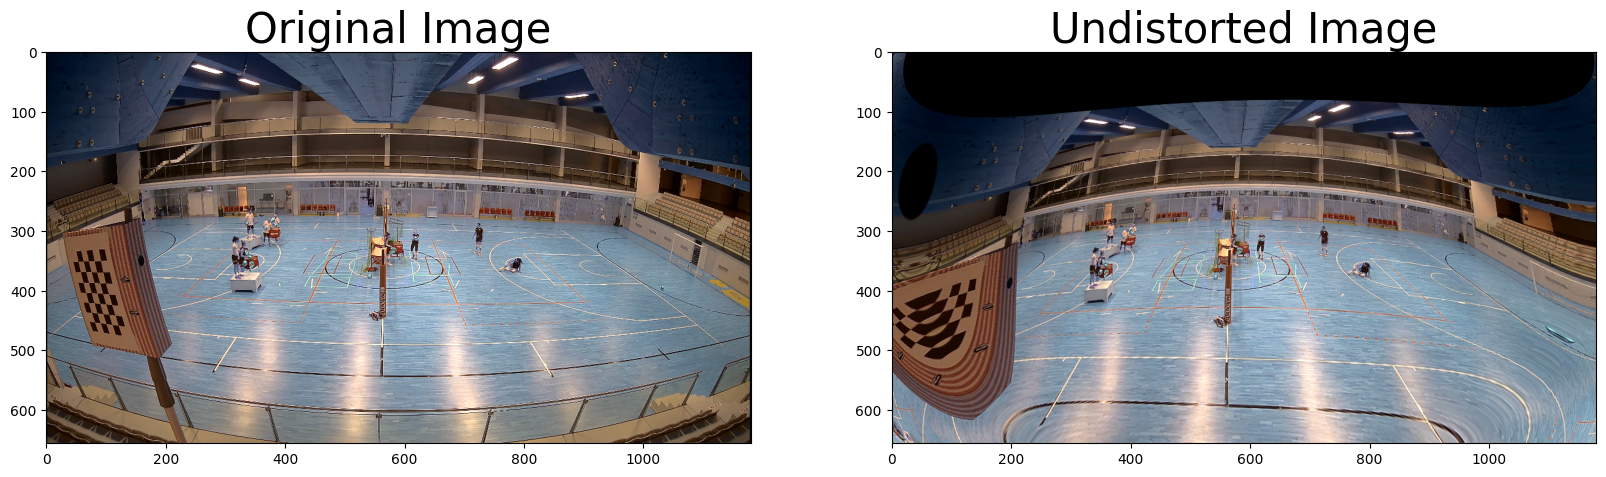

In [4]:
import pickle
%matplotlib inline
import matplotlib.pyplot as plt

# Test undistortion on an image
img = cv2.imread('samples/prova.PNG')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)


dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('samples/test_undist.jpg',dst)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "samples/wide_dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)